<a href="https://colab.research.google.com/github/ascle/colab_tcc2/blob/dev/5_modelagem-classificacao_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando bibliotecas<hr style='border: 2px solid red;'>


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Outras configurações<hr style='border: 2px solid red;'>



In [ ]:
!pip install ipython-autotime
pd.set_option('display.max_columns', None)
%load_ext autotime

SEED = 7
np.random.seed(SEED)

time: 10.1 ms (started: 2023-09-06 13:36:28 +00:00)


### Conectando no ambiente que será utilizado<hr style='border: 2px solid red;'>


In [ ]:
# Importando do Drive
from google.colab import drive
from os import chdir

drive.mount('/content/drive', force_remount=True)
chdir('/content/drive/MyDrive/UFS/tcc-2-ascle-ufs/bases/linkage_marco/')

Mounted at /content/drive
time: 4.02 s (started: 2023-09-06 13:36:28 +00:00)


#### Leitura dos dados

In [ ]:
data_raw = pd.read_csv('dn_etl.csv', sep=';', low_memory=False)
data_raw.sort_index(axis=1, inplace=True)

time: 584 ms (started: 2023-09-06 13:36:32 +00:00)


In [ ]:
data_raw.shape

(190020, 24)

time: 4 ms (started: 2023-09-06 13:36:33 +00:00)


In [ ]:
data_raw.head()

,ANO,APGAR1,APGAR5,CODANOMAL_QTD,CONSPRENAT,ESCMAEETL_VALOR,ESTCIVMAE_COMPANHEIRO,GRAVIDEZ_VALOR,LOCNASC_DOMICILIO,LOCNASC_ESTAB_SAUDE,LOCNASC_HOSPITAL,LOCNASC_OUTROS,OBT_NEONATAL,PARTO_CESAREO,PARTO_VAGINALL,PESO,QTDFILMORT,QTDPARTCES,SEMAGESTAC,SEXO_FEM,SEXO_MASC,TPAPRESENT_CEFALICO,TPAPRESENT_PELVICO,TPAPRESENT_TRANSVERSA
0,2015,2.0,4.0,0.0,5.0,1,0,1,0,0,1,0,0,1,0,820.0,1.0,NaN,26.0,0,1,1,0,0
1,2015,9.0,10.0,0.0,8.0,4,1,1,0,0,1,0,0,1,0,4200.0,1.0,NaN,39.0,0,1,1,0,0
2,2015,7.0,8.0,0.0,10.0,11,1,1,0,0,1,0,0,0,1,3700.0,0.0,0.0,40.0,1,0,1,0,0
3,2015,7.0,8.0,0.0,7.0,4,0,1,0,0,1,0,0,0,1,3550.0,1.0,0.0,37.0,0,1,1,0,0
4,2015,9.0,10.0,0.0,3.0,11,0,1,0,0,1,0,0,1,0,3800.0,0.0,NaN,39.0,1,0,1,0,0


time: 34.1 ms (started: 2023-09-06 13:36:33 +00:00)


## Dados X e y<hr style='border: 2px solid red;'>

In [ ]:
X_raw= data_raw.drop(columns=['QTDPARTCES', 'ANO', 'OBT_NEONATAL'])
y_raw= data_raw["OBT_NEONATAL"]

time: 21.6 ms (started: 2023-09-06 13:36:33 +00:00)


## Dados desbalanceados<hr style='border: 2px solid red;'>

https://imbalanced-learn.org/stable/introduction.html

https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

https://www.teses.usp.br/teses/disponiveis/55/55134/tde-06012016-145045/publico/VictorHugoBarella_dissertacao_revisada.pdf

https://www.hashtagtreinamentos.com/datasets-desbalanceados-ciencia-dados


In [ ]:
from imblearn.over_sampling import SMOTE

time: 183 ms (started: 2023-09-06 13:36:33 +00:00)


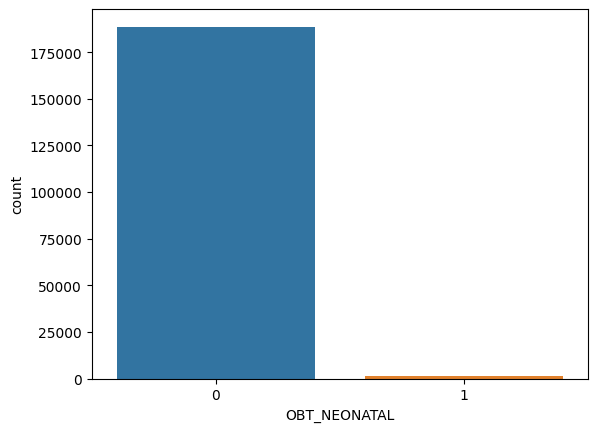

time: 498 ms (started: 2023-09-06 13:36:33 +00:00)


In [ ]:
ax = sns.countplot(x='OBT_NEONATAL', data=data_raw)

#### Oversampling Smote

https://arxiv.org/abs/1106.1813

Consiste em criar observações intermediárias entre dados parecidos

In [ ]:
smt = SMOTE(random_state=SEED)
X_bal, y_bal = smt.fit_resample(X_raw, y_raw)

time: 1.07 s (started: 2023-09-06 13:36:34 +00:00)


In [ ]:
data_bal = pd.concat([X_bal, y_bal], axis=1)

time: 121 ms (started: 2023-09-06 13:36:35 +00:00)


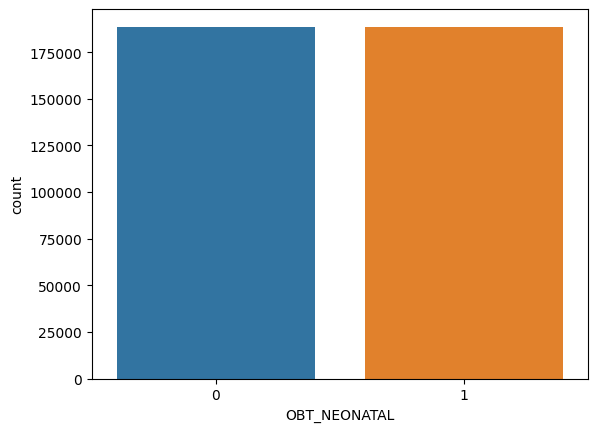

time: 457 ms (started: 2023-09-06 13:36:35 +00:00)


In [ ]:
ax = sns.countplot(x='OBT_NEONATAL', data=data_bal)

##Dados de treino e de teste<hr style='border: 2px solid red;'>

In [ ]:
from sklearn.model_selection import train_test_split

time: 514 µs (started: 2023-09-06 13:36:35 +00:00)


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_bal, y_bal, test_size =0.3,
                                                        random_state=SEED,
                                                        shuffle=True,
                                                        stratify=y_bal)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))
print()

Treinaremos com 264068 elementos e testaremos com 113172 elementos

time: 389 ms (started: 2023-09-06 13:36:35 +00:00)


### Métodos auxiliares

In [ ]:
def imprimir_metricas(_nome_modelo, _predito):
  print("A Acurácia do modelo {} foi {:.2f}%".format(_nome_modelo, (accuracy_score(y_teste, _predito) * 100)))
  print("A Precisão do modelo {} foi {:.2f}%".format(_nome_modelo, (precision_score(y_teste, _predito) * 100)))
  print("A Recall do modelo {} foi {:.2f}%".format(_nome_modelo, (recall_score(y_teste, _predito) * 100)))
  print("A F1 do modelo {} foi {:.2f}%".format(_nome_modelo, (f1_score(y_teste, _predito) * 100)))
  print()

time: 855 µs (started: 2023-09-06 13:36:36 +00:00)


In [ ]:
def imprime_metrica_cv(_nome_modelo, _results):
    media = _results['test_score'].mean()
    desvio_padrao = _results['test_score'].std()
    ini = (media - 2 * desvio_padrao)*100
    fim = (media + 2 * desvio_padrao) * 100
    print("A Sensibilidade do modelo {} com Cross Validation foi  [{:.2f}%, {:.2f}%]".format(_nome_modelo, ini, fim))
    print()

time: 768 µs (started: 2023-09-06 13:36:36 +00:00)


In [ ]:
  def tab_treino_teste_cv(max_depth, results):
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    tabela = [max_depth, train_score, test_score]
    return tabela

time: 713 µs (started: 2023-09-06 13:36:36 +00:00)


## Modelos Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import StratifiedKFold

from sklearn import metrics

time: 810 µs (started: 2023-09-06 14:26:20 +00:00)


### SGD Cross Validate
<hr style='border: 2px solid red;'>

In [ ]:
cv = StratifiedKFold(n_splits = 10, shuffle=True)
pip_sgd = make_pipeline(StandardScaler(),
                        SGDClassifier(max_iter=1000, tol=1e-3, random_state=SEED))
results = cross_validate(pip_sgd, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)

imprime_metrica_cv('Gradiente Descendente', results)
tab_treino_teste_cv()

A Sensibilidade do modelo Gradiente Descendente com Cross Validation foi  [95.58%, 96.30%]

time: 7.85 s (started: 2023-09-06 14:26:20 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

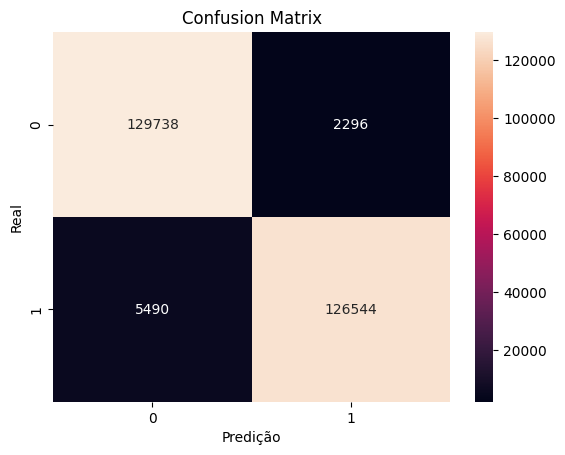

time: 6.9 s (started: 2023-09-06 14:26:28 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(pip_sgd, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

### KNN Cross Validate
<hr style='border: 2px solid red;'>

In [ ]:
cv = StratifiedKFold(n_splits = 10, shuffle=True)
pip_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(metric='euclidean'))
results = cross_validate(pip_knn, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)

imprime_metrica_cv('KNN', results)

A Sensibilidade do modelo KNN com Cross Validation foi  [99.64%, 99.80%]

time: 6min 17s (started: 2023-09-06 14:26:35 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

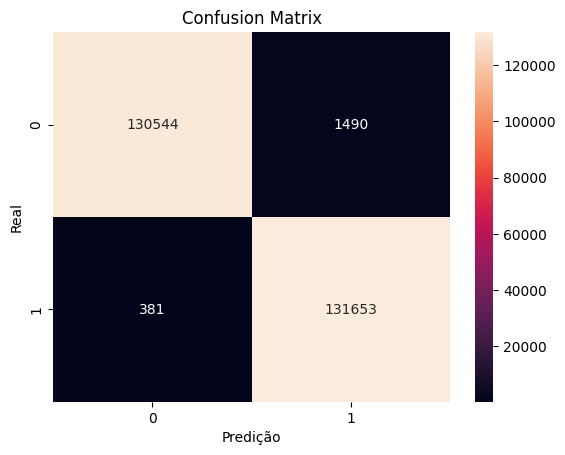

time: 6min 17s (started: 2023-09-06 14:32:52 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(pip_knn, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

### Árvore de Decisão Cross Validate
<hr style='border: 2px solid red;'>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

time: 524 µs (started: 2023-09-06 14:39:10 +00:00)


In [ ]:
cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo_dtc_cv = DecisionTreeClassifier()
results = cross_validate(modelo_dtc_cv, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)

imprime_metrica_cv('Decision Tree', results)

A Sensibilidade do modelo Decision Tree com Cross Validation foi  [99.44%, 99.67%]

time: 24.4 s (started: 2023-09-06 14:39:10 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

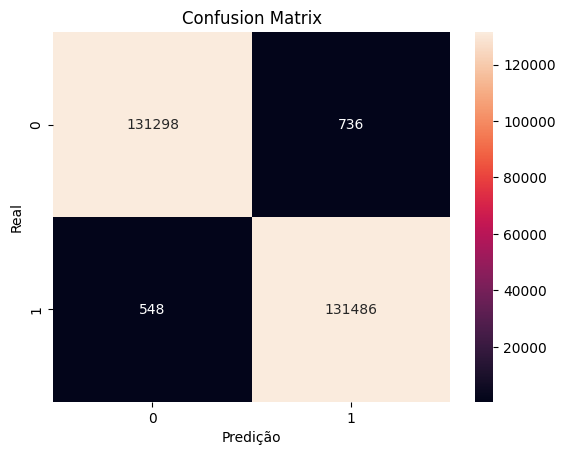

time: 24.2 s (started: 2023-09-06 14:39:34 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(modelo_dtc_cv, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

### Random Forest Cross Validate
<hr style='border: 2px solid red;'>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

time: 386 µs (started: 2023-09-06 14:39:59 +00:00)


In [ ]:
cv_rf = StratifiedKFold(n_splits = 10, shuffle=True)
modelo_rf_cv = RandomForestClassifier(n_estimators = 100)
results = cross_validate(modelo_rf_cv, X_treino, y_treino, cv = cv_rf, scoring='recall', return_train_score=False)

imprime_metrica_cv('Random Forest', results)

A Sensibilidade do modelo Random Forest com Cross Validation foi  [99.55%, 99.81%]

time: 5min 44s (started: 2023-09-06 14:39:59 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

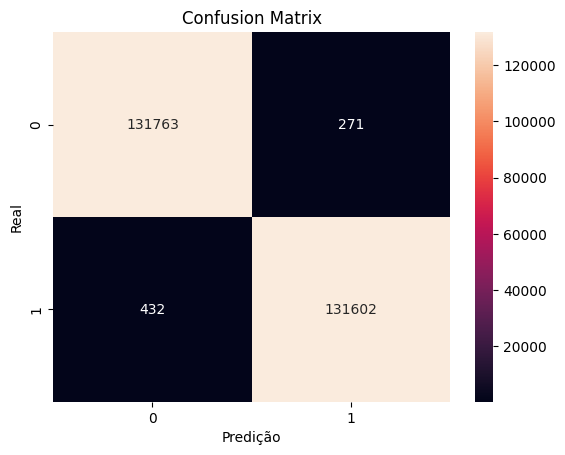

time: 5min 48s (started: 2023-09-06 14:45:43 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(modelo_rf_cv, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

## Modelos Hiper Parâmetros <hr style='border: 2px solid red;'>

### Árvore de Decisão Cross Validate Max-depht

In [ ]:
def rodar_arvore_decisao(max_depth):
  cv = StratifiedKFold(n_splits = 10, shuffle=True)
  modelo_dtc_cv = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo_dtc_cv, X_treino, y_treino, cv = cv, scoring='recall', return_train_score=True)

  return tab_treino_teste_cv(max_depth, results)

time: 909 µs (started: 2023-09-06 14:51:32 +00:00)


In [ ]:
resultados = [rodar_arvore_decisao(i) for i in range (1, 24)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])

time: 7min 19s (started: 2023-09-06 14:51:32 +00:00)


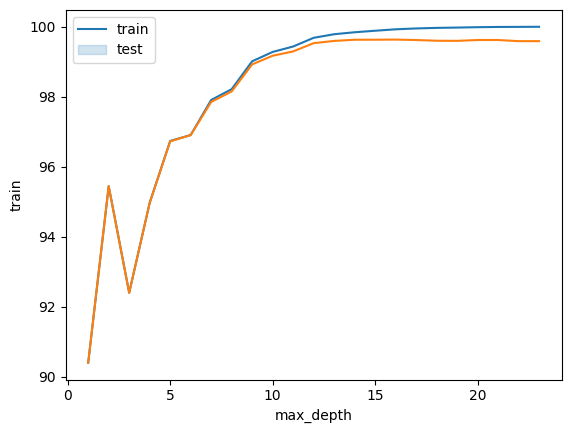

time: 758 ms (started: 2023-09-06 14:58:52 +00:00)


In [ ]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["train", "test"])

<font color="red">*Definir estimadores*</font>

### Random Forest Max deph

In [ ]:
def rodar_random_forest(max_depth):
  cv = StratifiedKFold(n_splits = 10, shuffle=True)
  modelo_rf_cv = RandomForestClassifier(n_estimators = 100, max_depth=max_depth)
  results = cross_validate(modelo_rf_cv, X_treino, y_treino, cv = cv, scoring='recall', return_train_score=True)

  return tab_treino_teste_cv(max_depth, results)

time: 898 µs (started: 2023-09-06 14:58:52 +00:00)


In [ ]:
resultados = [rodar_random_forest(i) for i in range (1, 24)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])

time: 1h 57min 29s (started: 2023-09-06 14:58:52 +00:00)


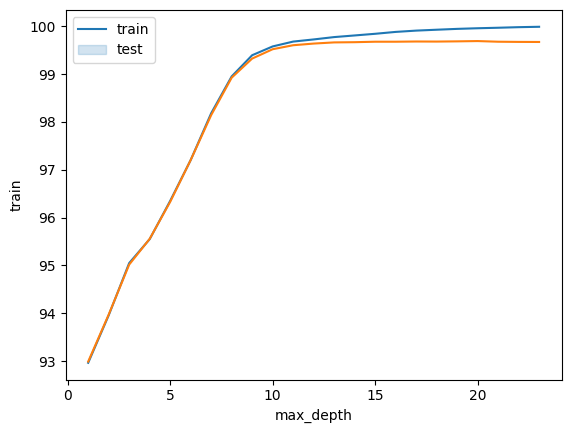

time: 352 ms (started: 2023-09-06 16:56:22 +00:00)


In [ ]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["train", "test"])

## Escolhendo o melhor modelo<hr style='border: 2px solid red;'>

**Métrica escolhida:**

**Random Forest**

Acurácia: 99.74%

Precisão: 99.81%

Recall: 99.67% < knn

F1: 99.74%

time: 364 ms (started: 2023-09-06 16:56:22 +00:00)
